In [10]:
import pandas as pd
import os
data_dir = "./data"
data_path = os.path.join(data_dir,"poems.csv")
data_df = pd.read_csv(data_path)

In [11]:
data_df.head()

,题目,朝代,作者,内容
0,赠歌者杜氏入道三首 其三,元,潘纯,云髻高梳鬓不分，扫除虚室事元君。新糊白纸屏风上，尽画蓬莱五色云。
1,七岁游法兴寺,元,胡天游,山色摇光入袖凉，松阴十丈印回廊。老僧读罢楞严咒，一殿神风柏子香。
2,新岁忆曾子白,元,陈高,经月愁闻雨，新年苦忆君。青华为客久，白发著书勤。酒共邻僧饮，蔬从野老分。何时共登眺，整屐待晴云。
3,城西虎跑寺,元,陈高,石势虎蹲伏，山形龙屈盘。寺开唐殿阁，坟掩宋衣冠。幽涧泉声细，斜阳塔影寒。近城多战鼓，栖息此中安。
4,赠章以元昆仲,元,陈高,相见谈经史，江楼坐夜阑。风声吹屋响，灯影照人寒。俗薄交游尽，时危出处难。衰年逢二妙，亦得闷怀宽。


In [12]:
from collections import Counter
import gc

## 全局高频词分析

In [13]:
data=data_df.loc[data_df['朝代'] =="唐", ['内容']][:10]
data

,内容
58259,风淅淅。夜雨连云黑。滴滴。窗外芭蕉灯下客。除非魂梦到乡国。免被关山隔。忆忆。一句枕前争忘得。
58260,别路云初起，离亭叶正飞。所嗟人异雁，不作一行归。
58261,弄玉有夫皆得道，刘纲兼室尽登仙。君能仔细窥朝露，须逐云车拜洞天。
58262,萧郎不顾凤楼人，云涩回车泪脸新。愁想蓬瀛归去路，难窥旧苑碧桃春。
58263,谪居蓬岛别瑶池，春媚烟花有所思。为爱君心能洁白，愿操箕帚奉屏帏。
58264,湖上青山今欲买，白云无主问何人。
58265,一朵花开千叶红，开时又不藉春风。若教移在香闺畔，定与佳人艳态同。
58266,不语凄凉无限情，荒阶行尽又重行。昔年住此何人在，满地槐花秋草生。
58267,霜陨中春花半无，狂游恣饮尽凶徒。年年赏玩公卿辈，今委沟塍骨渐枯。
58268,风舞槐花落御沟，终南山色入城秋。门门走马徵兵急，公子笙歌醉玉楼。


In [14]:
data_df.dropna(subset=['内容'], inplace=True)

del data
gc.collect()

16

In [17]:
dynastys=["先秦", "汉", "魏晋", "隋", "唐", "五代", "宋", "辽", "金", "元", "明", "清", "民国", "近代", "当代","未知"]

stopwords = set(["","，","。"," ","？","“","!","\u3000","、","”","□",
                 "：","！","；",
                '有','而', '何', '乎', '乃', '其', '且', '若', 
                 '所', '为', '焉', '以', '因', '于', '与', '也', 
                 '则', '者', '之', '不', '自', '得', '一', '来',
                 '去', '无', '可', '是', '已', '此', '的', '上',
                 '中', '兮', '三'])

## 全局高频字 

In [18]:
text="".join(data_df["内容"].values)
text = "".join([w for w in text if w not in stopwords])
res=Counter(text).most_common()
print(res[:200])

[('人', 631986), ('山', 478570), ('风', 412634), ('天', 401544), ('日', 374115), ('花', 346764), ('春', 318550), ('云', 310477), ('生', 301563), ('如', 301216), ('年', 299462), ('月', 291275), ('水', 279604), ('我', 262278), ('相', 250397), ('心', 250314), ('知', 238567), ('时', 233736), ('清', 229069), ('未', 220861), ('君', 217326), ('秋', 215899), ('江', 214340), ('子', 213035), ('雨', 208888), ('白', 205925), ('今', 203847), ('千', 199605), ('行', 197310), ('明', 192739), ('事', 192478), ('老', 192117), ('空', 190819), ('下', 190674), ('高', 188453), ('在', 184782), ('长', 183882), ('里', 183579), ('夜', 183207), ('青', 182734), ('寒', 182431), ('家', 178710), ('玉', 175725), ('归', 168761), ('酒', 164427), ('南', 164184), ('金', 162181), ('前', 161966), ('多', 160126), ('道', 159623), ('落', 158182), ('流', 156239), ('客', 155447), ('见', 154671), ('新', 153304), ('成', 150729), ('万', 148147), ('欲', 147531), ('更', 147370), ('西', 147063), ('香', 146568), ('谁', 146482), ('深', 145211), ('看', 144728), ('出', 142850), ('古', 141540), ('作', 140

## 各朝代高频字 

In [16]:

for dynasty in dynastys:
    for a in data_df.loc[data_df['朝代'] ==dynasty, ['内容']]["内容"].values:
        if isinstance(a,float):
            print(a)
    poem_str = "".join(data_df.loc[data_df['朝代'] ==dynasty, ['内容']]["内容"].values)
    poem_str = "".join([w for w in poem_str if w not in stopwords])
    print("--"*10,dynasty,"--"*10)
#     print(poem_str[:10])
    res=Counter(poem_str).most_common()
    print(res[:30])
    del poem_str,res
    gc.collect()
    print("\n")

-------------------- 先秦 --------------------
[('子', 1682), ('我', 1477), ('人', 1301), ('曰', 1072), ('君', 1012), ('王', 981), ('天', 768), ('如', 709), ('矣', 682), ('心', 671), ('彼', 652), ('既', 605), ('言', 547), ('大', 539), ('尔', 528), ('维', 524), ('下', 507), ('将', 486), ('吾', 479), ('公', 473), ('在', 471), ('知', 457), ('国', 454), ('夫', 451), ('行', 439), ('民', 431), ('日', 396), ('思', 374), ('归', 363), ('方', 347)]


-------------------- 汉 --------------------
[('人', 1020), ('子', 963), ('王', 791), ('天', 706), ('下', 689), ('曰', 632), ('我', 580), ('心', 518), ('相', 495), ('公', 479), ('大', 465), ('日', 453), ('生', 440), ('行', 439), ('时', 432), ('故', 430), ('长', 422), ('如', 403), ('能', 401), ('君', 398), ('夫', 392), ('将', 373), ('欲', 367), ('言', 366), ('知', 366), ('余', 356), ('臣', 350), ('风', 343), ('后', 339), ('秦', 338)]


-------------------- 魏晋 --------------------
[('我', 1674), ('人', 1592), ('天', 1312), ('风', 1225), ('子', 1061), ('时', 1043), ('云', 1010), ('日', 987), ('生', 965), ('心', 921), ('在', 

# 高频词云

In [21]:
font_path=os.path.join(data_dir,"..","fonts",'simsun.ttc')
print(font_path)
os.environ['FONT_PATH'] =font_path #linux
# print(font_path)

from wordcloud import WordCloud
import matplotlib.pyplot as plt
from collections import Counter

stopwords = set(["","，","。"," ","？","“","!","\u3000","、","”","□",
                 "：","！","；",
                '有','而', '何', '乎', '乃', '其', '且', '若', 
                 '所', '为', '焉', '以', '因', '于', '与', '也', 
                 '则', '者', '之', '不', '自', '得', '一', '来',
                 '去', '无', '可', '是', '已', '此', '的', '上',
                 '中', '兮', '三'])
cloud = WordCloud(
    # 设置字体，不指定就会出现乱码
    font_path=font_path,
    # font_path=path.join(d,'simsun.ttc'),
    # 设置背景色
    background_color='white',
    # # 词云形状
    # mask=color_mask,
    # 允许最大词汇
    max_words=200,
    # 最大号字体
#     max_font_size=40,
    min_font_size=10,
#     width = 6000,
#     height = 4000,
#     background_color = 'black',
)


def show_wordcloud(text,dynasty):
    """以空格分隔的字符串"""
    _word_counts = Counter(text.split(" "))
#     print(_word_counts.most_common()[:20])
    word_counts={w:c for w,c in _word_counts.items() if w not in stopwords}
    wCloud = cloud.generate_from_frequencies(word_counts)
    wCloud.to_file('{}.jpg'.format(dynasty))
    plt.imshow(wCloud, interpolation='bilinear')
    plt.axis('off')
    plt.show()

./data\..\fonts\simsun.ttc


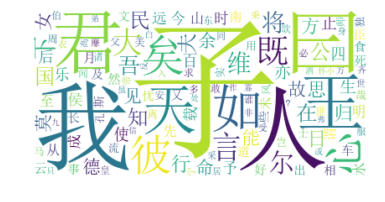

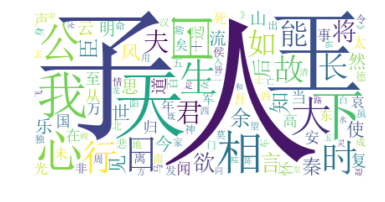

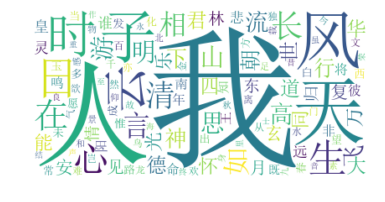

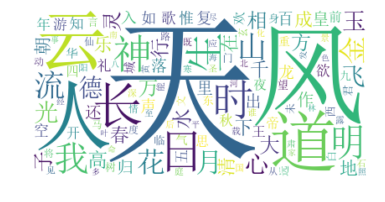

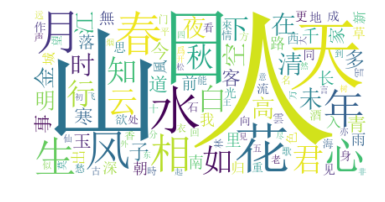

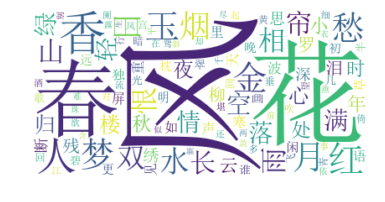

In [ ]:
for dynasty in dynastys:
    poem_str = "".join(data_df.loc[data_df['朝代'] ==dynasty, ['内容']]["内容"].values)
    poem_str = " ".join([w for w in poem_str if w not in stopwords])
    print("--"*10,dynasty,"--"*10)
    show_wordcloud(poem_str,dynasty)